In [1]:
import pandas as pd

# Excel dosyasını yükleyelim
file_path = "/content/task1-dataset-1723704917.xlsx"
df = pd.read_excel(file_path)

# İlk birkaç satırı inceleyelim
print(df.head())

# Verilerin genel özetini alalım
print(df.info())


   order_id          order_time order_city    order_area order_kitchen  \
0   9450303 2024-07-26 01:26:02   İstanbul    Sancaktepe      Kahvaltı   
1   3091190 2024-02-24 13:44:21   İstanbul          Şile         Pizza   
2   8040029 2024-01-06 19:26:41   İstanbul        Beykoz          Pide   
3   9828010 2024-08-23 16:32:36   İstanbul      Bakırköy        Burger   
4   7887475 2024-07-19 09:23:03   İstanbul  Büyükçekmece        Burger   

   order_restaurant_id  order_size_TRY preffered_payment_method  isSeamless  \
0               723542             103           Online Payment           1   
1               207622              80                     Cash           1   
2                35740             168                     Cash           1   
3               614173             104        Credit/Debit Card           1   
4               818521             415           Online Payment           1   

   isnotSeamless contact_reason_CSRLevel3 contact_reason_MainGroup  isContact  \

In [3]:
# Self-service kullanan müşterileri filtreleyelim
self_service_data = df[df['isSelfService'] == 1]

# Self-service kullanan müşterilerin ortalama memnuniyet puanını hesaplayalım
average_self_service_csat = self_service_data['SelfServiceCSAT'].mean()

print(f"Self-service kullanan müşterilerin ortalama memnuniyet puanı: {average_self_service_csat:.2f}")

# Self-service kullanım oranını hesaplayalım
total_orders = len(df)
self_service_count = len(self_service_data)
self_service_rate = (self_service_count / total_orders) * 100

print(f"Self-service kullanım oranı: {self_service_rate:.2f}%")


Self-service kullanan müşterilerin ortalama memnuniyet puanı: 2.78
Self-service kullanım oranı: 20.37%


In [4]:
# Operatör ile iletişime geçen müşterileri filtreleyelim
contact_data = df[df['isContact'] == 1]

# Operatörle iletişime geçen müşterilerin ortalama memnuniyet puanını hesaplayalım
average_contact_csat = contact_data['ContactCSAT'].mean()

print(f"Operatörle iletişime geçen müşterilerin ortalama memnuniyet puanı: {average_contact_csat:.2f}")

# Operatörle iletişim kurma oranını hesaplayalım
contact_count = len(contact_data)
contact_rate = (contact_count / total_orders) * 100

print(f"Operatörle iletişime geçme oranı: {contact_rate:.2f}%")


Operatörle iletişime geçen müşterilerin ortalama memnuniyet puanı: 2.73
Operatörle iletişime geçme oranı: 5.01%


In [5]:
# NPS-Q-Score sütununu inceleyelim
nps_scores = df['NPS-Q-Score']

# NPS kategorilerini belirleyelim
promoters = nps_scores[nps_scores >= 9].count()
detractors = nps_scores[nps_scores <= 6].count()
total_respondents = len(nps_scores)

# NPS skorunu hesaplayalım
nps = ((promoters - detractors) / total_respondents) * 100

print(f"NPS (Net Promoter Score): {nps:.2f}")


NPS (Net Promoter Score): 20.75


In [6]:
# Şehre göre müşteri segmentasyonu yapalım ve her segment için ortalama NPS ve CSAT hesaplayalım
city_segment_analysis = df.groupby('order_city').agg({
    'NPS-Q-Score': 'mean',
    'ContactCSAT': 'mean',
    'SelfServiceCSAT': 'mean',
    'isSelfService': 'mean',
    'isContact': 'mean'
}).reset_index()

print(city_segment_analysis)


  order_city  NPS-Q-Score  ContactCSAT  SelfServiceCSAT  isSelfService  \
0   İstanbul       7.9221       0.1366          0.56574         0.2037   

   isContact  
0     0.0501  


In [7]:
# Korelasyon matrisi oluşturalım
correlation_matrix = df[['NPS-Q-Score', 'ContactCSAT', 'SelfServiceCSAT', 'order_size_TRY', 'isSelfService', 'isContact']].corr()

print(correlation_matrix)


                 NPS-Q-Score  ContactCSAT  SelfServiceCSAT  order_size_TRY  \
NPS-Q-Score         1.000000    -0.088348        -0.198975        0.004488   
ContactCSAT        -0.088348     1.000000        -0.092008        0.006698   
SelfServiceCSAT    -0.198975    -0.092008         1.000000       -0.002208   
order_size_TRY      0.004488     0.006698        -0.002208        1.000000   
isSelfService      -0.257549    -0.104726         0.878565       -0.001656   
isContact          -0.095985     0.901605        -0.102050        0.008257   

                 isSelfService  isContact  
NPS-Q-Score          -0.257549  -0.095985  
ContactCSAT          -0.104726   0.901605  
SelfServiceCSAT       0.878565  -0.102050  
order_size_TRY       -0.001656   0.008257  
isSelfService         1.000000  -0.116155  
isContact            -0.116155   1.000000  


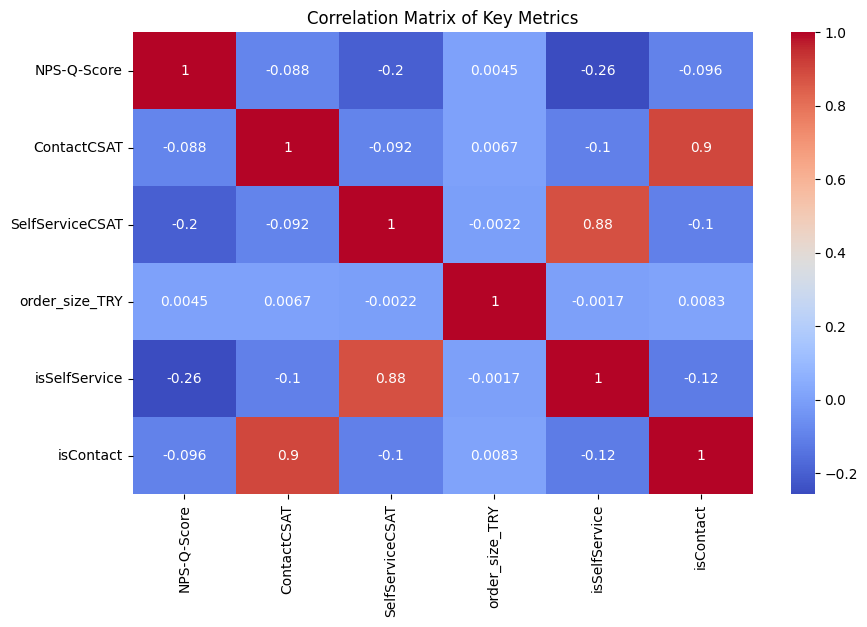

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon ısı haritası
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()


In [9]:
import statsmodels.api as sm

# Bağımsız değişkenler ve bağımlı değişkenleri tanımlayalım
X = df[['order_size_TRY', 'isSelfService', 'isContact']]
y = df['ContactCSAT']

# Bağımsız değişkenlere sabit ekleyelim
X = sm.add_constant(X)

# Regresyon modelini oluşturalım ve sonucu özetleyelim
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            ContactCSAT   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 7.240e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:37:23   Log-Likelihood:                -8247.7
No. Observations:               50000   AIC:                         1.650e+04
Df Residuals:                   49996   BIC:                         1.654e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.003      0.

In [10]:
# Her ay için strateji sonrası NPS ve CSAT puanlarını karşılaştıralım
post_strategy_analysis = df[df['order_time'] > '2024-01-01'].resample('M', on='order_time').agg({
    'NPS-Q-Score': 'mean',
    'ContactCSAT': 'mean',
    'SelfServiceCSAT': 'mean'
}).reset_index()

print(post_strategy_analysis)


  order_time  NPS-Q-Score  ContactCSAT  SelfServiceCSAT
0 2024-01-31     7.928350     0.133995         0.553815
1 2024-02-29     7.914594     0.144942         0.590050
2 2024-03-31     7.922632     0.143639         0.565958
3 2024-04-30     7.904572     0.129955         0.593990
4 2024-05-31     7.907874     0.144569         0.564737
5 2024-06-30     7.920072     0.122741         0.542569
6 2024-07-31     7.915773     0.134508         0.565733
7 2024-08-31     7.964156     0.138256         0.549389


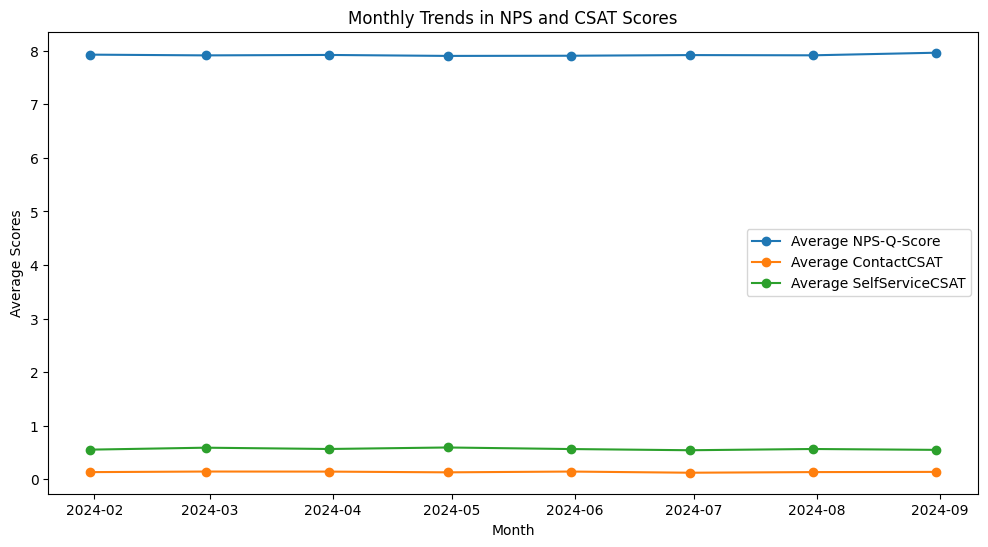

In [11]:
# Görsel boyutunu ayarlayalım
plt.figure(figsize=(12, 6))

# NPS-Q-Score çizgi grafiği
plt.plot(post_strategy_analysis['order_time'], post_strategy_analysis['NPS-Q-Score'], label='Average NPS-Q-Score', marker='o')

# ContactCSAT çizgi grafiği
plt.plot(post_strategy_analysis['order_time'], post_strategy_analysis['ContactCSAT'], label='Average ContactCSAT', marker='o')

# SelfServiceCSAT çizgi grafiği
plt.plot(post_strategy_analysis['order_time'], post_strategy_analysis['SelfServiceCSAT'], label='Average SelfServiceCSAT', marker='o')

# Başlık ve etiketler
plt.title('Monthly Trends in NPS and CSAT Scores')
plt.xlabel('Month')
plt.ylabel('Average Scores')
plt.legend()

# Grafiği göster
plt.show()


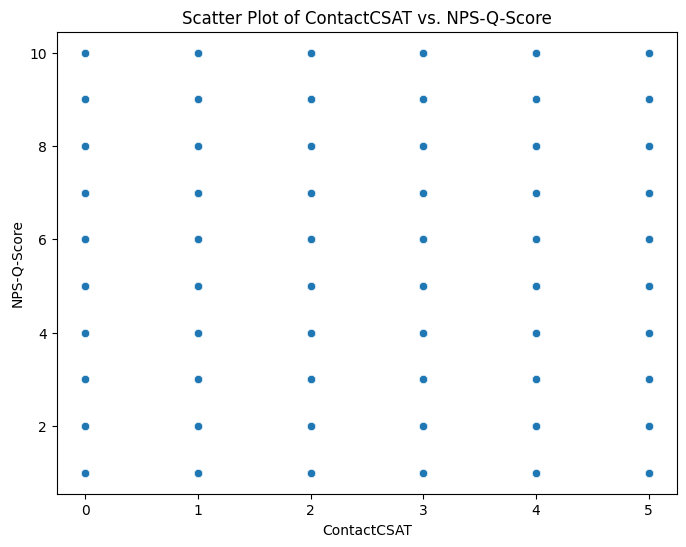

In [13]:
# NPS-Q-Score ve ContactCSAT arasındaki ilişkiyi incelemek için dağılım grafiği
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ContactCSAT', y='NPS-Q-Score', data=df)
plt.title('Scatter Plot of ContactCSAT vs. NPS-Q-Score')
plt.xlabel('ContactCSAT')
plt.ylabel('NPS-Q-Score')
plt.show()


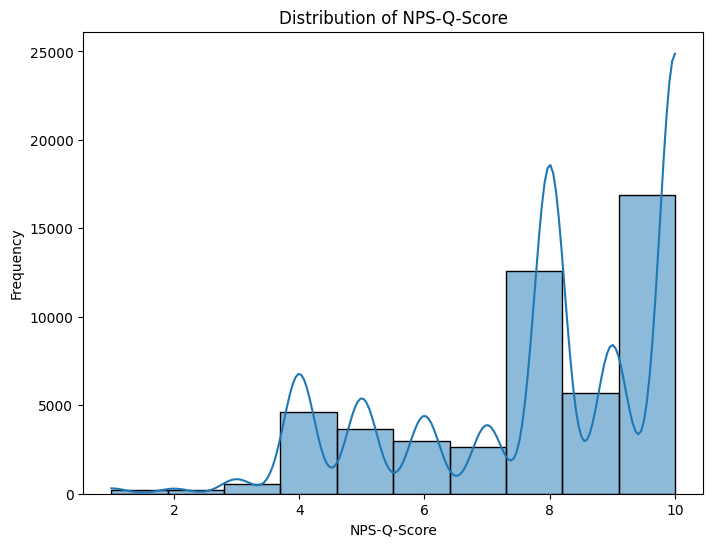

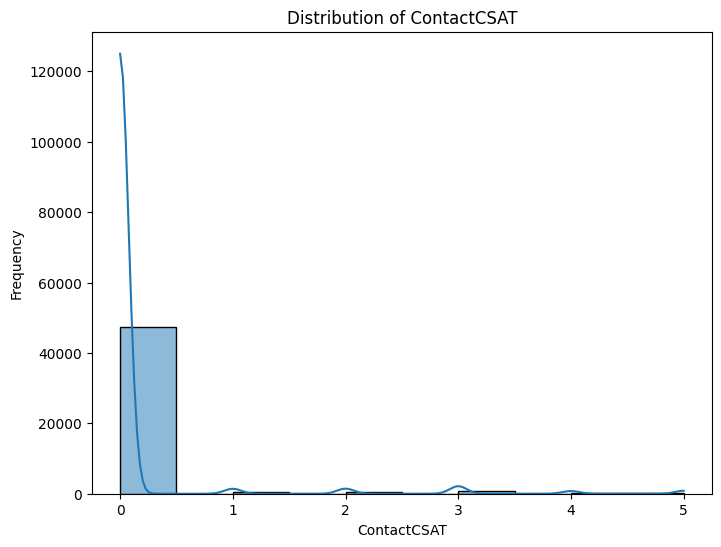

In [14]:
# NPS-Q-Score dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(df['NPS-Q-Score'], kde=True, bins=10)
plt.title('Distribution of NPS-Q-Score')
plt.xlabel('NPS-Q-Score')
plt.ylabel('Frequency')
plt.show()

# ContactCSAT dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(df['ContactCSAT'], kde=True, bins=10)
plt.title('Distribution of ContactCSAT')
plt.xlabel('ContactCSAT')
plt.ylabel('Frequency')
plt.show()


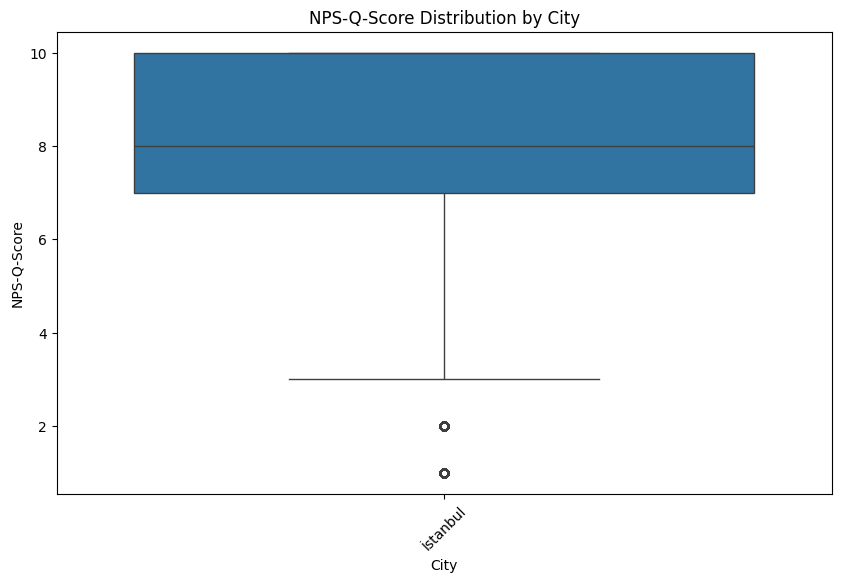

In [15]:
# Şehre göre NPS-Q-Score box plotu
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_city', y='NPS-Q-Score', data=df)
plt.title('NPS-Q-Score Distribution by City')
plt.xlabel('City')
plt.ylabel('NPS-Q-Score')
plt.xticks(rotation=45)
plt.show()


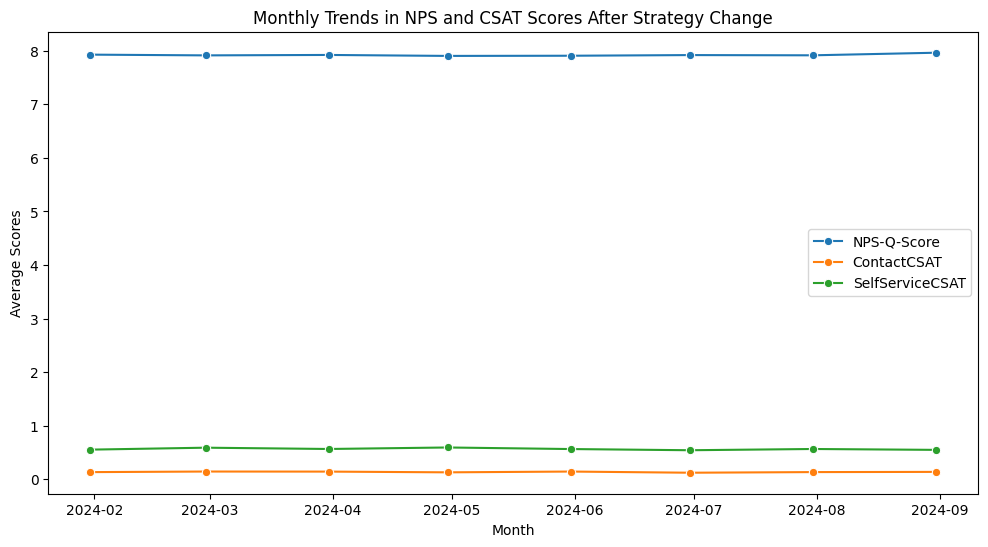

In [16]:
# Aylık trend çizgi grafikleri
plt.figure(figsize=(12, 6))

# NPS-Q-Score trend çizgisi
sns.lineplot(x='order_time', y='NPS-Q-Score', data=post_strategy_analysis, label='NPS-Q-Score', marker='o')

# ContactCSAT trend çizgisi
sns.lineplot(x='order_time', y='ContactCSAT', data=post_strategy_analysis, label='ContactCSAT', marker='o')

# SelfServiceCSAT trend çizgisi
sns.lineplot(x='order_time', y='SelfServiceCSAT', data=post_strategy_analysis, label='SelfServiceCSAT', marker='o')

plt.title('Monthly Trends in NPS and CSAT Scores After Strategy Change')
plt.xlabel('Month')
plt.ylabel('Average Scores')
plt.legend()
plt.show()
